In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
fm = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fm.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

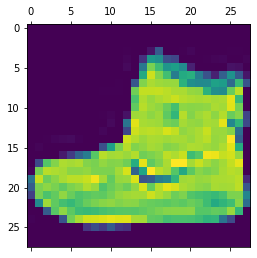

In [7]:
plt.matshow(X_train[0])
plt.savefig('number.png')

In [8]:
y_train[0]

9

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [12]:
model = Sequential()

In [23]:
model.add(Flatten(input_shape = [28,28]))


model.add(Dense(1000, activation='relu'))

model.add(Dense(10,activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 200)               2200      
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
 flatten_2 (Flatten)         (None, 10)                0

In [25]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3299 - accuracy: 0.8949
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2617 - accuracy: 0.9077
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2521 - accuracy: 0.9105
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2479 - accuracy: 0.9102
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2399 - accuracy: 0.9136


In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8815


[0.36084532737731934, 0.8815000057220459]

In [28]:
y_predicted = model.predict(X_test)

In [29]:
y_predicted[0]

array([1.0399222e-03, 2.4257302e-03, 1.0235310e-03, 4.6119094e-04,
       1.4743805e-03, 4.7847688e-02, 2.9654205e-03, 2.1713385e-01,
       4.5771003e-03, 9.9367088e-01], dtype=float32)

In [30]:
np.argmax(y_predicted[0])

9

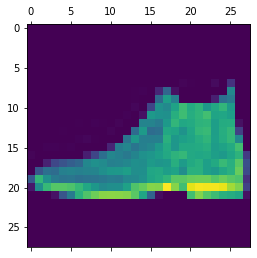

In [31]:
plt.matshow(X_test[0])

In [32]:
y_predicted_labels = []

for i in y_predicted:
  y_predicted_labels.append(np.argmax(i))

In [33]:
cnn = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cnn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[869,   1,  18,  12,   4,   2,  90,   0,   4,   0],
       [  3, 978,   1,  11,   5,   0,   2,   0,   0,   0],
       [ 15,   1, 814,   5, 119,   0,  45,   0,   0,   1],
       [ 26,  13,  22, 825,  91,   0,  21,   0,   2,   0],
       [  1,   0,  89,   5, 889,   0,  15,   0,   1,   0],
       [  0,   0,   0,   1,   0, 968,   0,  22,   0,   9],
       [136,   1,  98,  18, 143,   0, 600,   0,   4,   0],
       [  0,   0,   0,   0,   0,  12,   0, 953,   0,  35],
       [  7,   0,   9,   3,   8,   3,   3,   5, 962,   0],
       [  0,   0,   0,   0,   0,  13,   1,  29,   0, 957]], dtype=int32)>

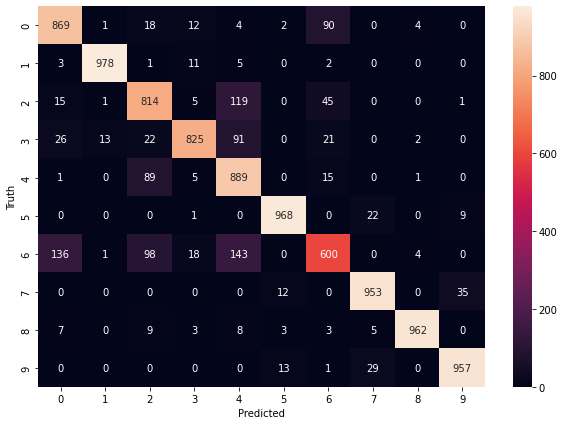

In [34]:
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cnn, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('class.png')